In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Start by loading data and taking a look

In [2]:
path = '/home/juanpelvis/Documents/Inclino/for_juanpedro/'
pathpics = '/home/juanpelvis/Documents/Inclino/'
XY_inclinos = {
1: (959419.686,2117521.867, 'k', 'Boreholes'),
2: (959323.003,2117572.501, 'k','Boreholes'),
3: (959305.421,2117582.196, 'k', 'Boreholes'),
4: (959294.729,2117586.937, 'k','Boreholes'),
5: (959165.809,2117701.152, 'k','Boreholes'),}
gps = pd.read_csv(path + 'gps.xyz')
gps

,x,y,station
0,959319.312882,2.117580e+06,ARG1
1,959222.574936,2.117646e+06,ARG2
2,959203.356267,2.117660e+06,ARG3
3,959174.623079,2.117686e+06,ARG4
4,959066.769090,2.117758e+06,ARG5
5,959416.378286,2.117520e+06,ARG6
6,959318.747170,2.117776e+06,AR3D
7,959089.704104,2.117572e+06,AR3G
8,958990.974157,2.117710e+06,AR5G
9,959158.423795,2.117877e+06,AR5D


In [3]:
stations = {}
for station in gps.index:
    stations[ gps['station'].loc[station]] = {}
    stations[ gps['station'].loc[station]]['x'] = gps['x'].loc[station]
    stations[ gps['station'].loc[station]]['y'] = gps['y'].loc[station]
    stations[ gps['station'].loc[station]]['velocityfile'] = path + 'vel_' + gps['station'].loc[station].lower() + '_2020.dat'

<AxesSubplot:>

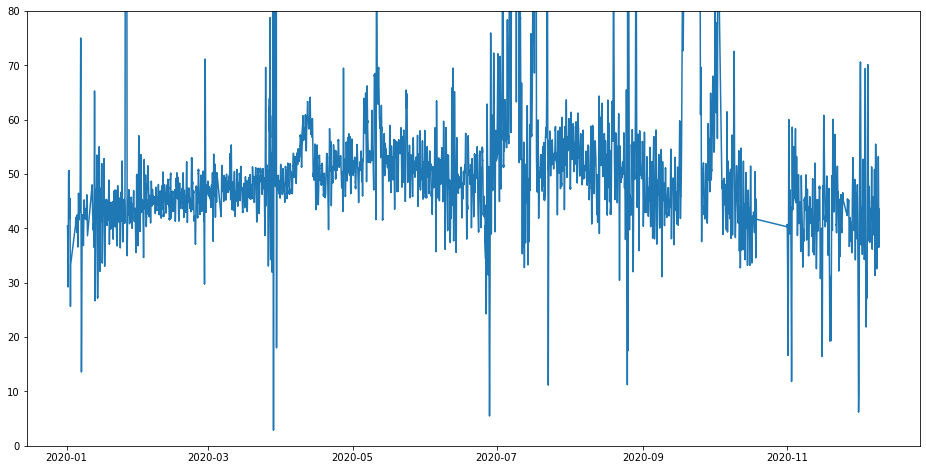

In [4]:
for station in ['ARG1']:
    vv = pd.read_csv(stations[station]['velocityfile'], sep = '\t', skiprows=1)
    vv.columns = ['TIMESTAMP', 'mm/h']
    vv.set_index('TIMESTAMP', inplace = True)
    vv.dropna( inplace=True)
    vv.index = pd.to_datetime( vv.index, format = '%Y-%m-%dT%H:%M:%S')
    # vv is EVERY 30 SECONDS
    vv['m/a'] = 1e-3*365.25*24*vv['mm/h']

figvv,axvv = plt.subplots(figsize = (16,8))
axvv.plot(vv['m/a'])
axvv.set_ylim([0,80])
axvv

In [5]:
vv.iloc[390000:390050]

,mm/h,m/a
TIMESTAMP,,
2020-05-21 12:22:00,6.673862,58.503072
2020-05-21 12:22:30,6.673356,58.498635
2020-05-21 12:23:00,6.672913,58.494755
2020-05-21 12:23:30,6.672708,58.492958
2020-05-21 12:24:00,6.672939,58.494986
2020-05-21 12:24:30,6.673479,58.499713
2020-05-21 12:25:00,6.674016,58.504428
2020-05-21 12:25:30,6.674177,58.505832
2020-05-21 12:26:00,6.674142,58.505532


In [6]:
for station in stations:
    vv = pd.read_csv(stations[station]['velocityfile'], sep = '\t', skiprows = 1)
    vv.columns = ['TIMESTAMP', 'mm/h']
    vv.set_index('TIMESTAMP', inplace = True)
    vv.dropna( inplace=True)
    vv.index = pd.to_datetime( vv.index, format = '%Y-%m-%dT%H:%M:%S')
    # vv is EVERY 30 SECONDS
    vv['m/a'] = 1e-3*365.25*24*vv['mm/h']
    vv.drop( vv.index[vv['m/a'] > 100], inplace = True)
    one_week_in_seconds = 7 * 24 * 120
    vv_averaged = vv.resample('D').mean()
    vv_averaged = vv.rolling(window = int(one_week_in_seconds), center = True).mean().iloc[ int(0.5 * one_week_in_seconds) : -int(0.5 * one_week_in_seconds) : int(one_week_in_seconds/7)]#( axis = 1)
    stations[station]['velocity'] = vv
    stations[station]['velocity_averaged'] = vv_averaged

# Here I define the averaging timewindow from the hourly or every 30 seconds timeseries

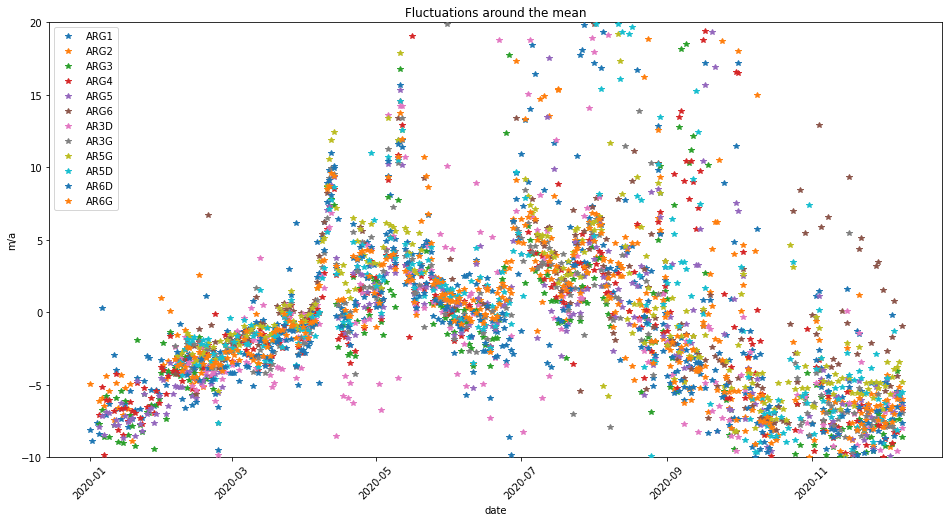

In [7]:
from datetime import datetime
fig, ax = plt.subplots( figsize = (16,8))
usurf_fivedays_averages = {}
DAYS = 'D'
FIRSTDAY = datetime.strptime('2020-02-01','%Y-%m-%d')#'2019-04-01','%Y-%m-%d')
for station in stations:
    usurf_fivedays_averages[station] = stations[station]['velocity'].resample(DAYS, origin  =FIRSTDAY).mean()
colors_per_station = {}    
for station in stations:
    #
    color = next(ax._get_lines.prop_cycler)['color']
    colors_per_station[station] = color
    ax.plot(usurf_fivedays_averages[station]['m/a'] - usurf_fivedays_averages[station]['m/a'].mean(), '*', zorder = 3, color = color, label = station)
ax.set_title('Fluctuations around the mean')
ax.set_ylabel('m/a')
ax.legend(loc = 'upper left')
ax.set_xlabel('date')
ax.set_ylim([-10, 20])
ax.tick_params(axis='x', labelrotation=45)
fig.savefig(pathpics + 'allvelocities_fluctuations_in_Argentiere2020.png', dpi = 200, bbox_inches = 'tight')
#
## Fill data
station_names = [station for station in stations]
PD_all = pd.concat( [usurf_fivedays_averages[station]['m/a'] for station in station_names], axis = 1)
PD_all.columns = station_names
PD_all
PD_all.to_csv(path + 'tableau_vitesse_surface_Arg2020_5jours_0p12.csv')

[38.57410404 41.95866416 40.64239003 38.48842883 39.41506096 38.4634545
 35.97730869 38.54905909 36.55716517 38.55378226 44.05871484 45.82799239
 35.80794687 40.03896173 38.16152791 37.21214808 34.88141231 38.04546408
 36.45462858 38.28615917]
['2020-09-21T00:00:00.000000000' '2020-09-22T00:00:00.000000000'
 '2020-09-23T00:00:00.000000000' '2020-09-24T00:00:00.000000000'
 '2020-09-25T00:00:00.000000000' '2020-09-26T00:00:00.000000000'
 '2020-09-27T00:00:00.000000000' '2020-09-28T00:00:00.000000000'
 '2020-09-29T00:00:00.000000000' '2020-09-30T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000' '2020-10-02T00:00:00.000000000'
 '2020-10-03T00:00:00.000000000' '2020-10-04T00:00:00.000000000'
 '2020-10-05T00:00:00.000000000' '2020-10-06T00:00:00.000000000'
 '2020-10-07T00:00:00.000000000' '2020-10-08T00:00:00.000000000'
 '2020-10-09T00:00:00.000000000' '2020-10-10T00:00:00.000000000']
Rows  4129
Columns  353
Shape of A (4129, 353)
nofbetas , 341
len indices  341


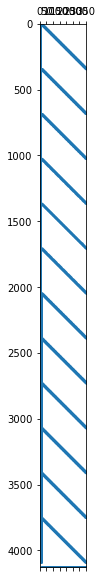

In [8]:
############ DATA LOADED in usurf_fivedays_averages[station]
#
## Lliboutry's linear model: u_i(t) = \alpha_i + \beta(t)
## where \alpha_i is the mean velocity at station i, and \beta(t) is the temporal fluctuation
## Hypothesis of the model:
## i)  Glacier d'Argentière moves like a block of ice: \beta(t) is the same for ALL stations
## ii) Obviously, \Sum\beta(t) = 0 (the fluctuations must total zero)
##
## In matricial form
##
## o = A x, with:
## o : vector of observations u_{i,t} : velocity at station i, at time t
## A : matrix of factors
## x : vector of unknowns
### Build vectors:
def nofbetas_from_pd(df, stations):
    return (df[stations].sum(axis = 1) > 0).sum(), df[stations].loc[df[stations].sum(axis = 1) > 0].index
def build_vector_obs(df_velocities):
    o = np.array([])
    TS = np.array([],  dtype='datetime64[s]')
    nobs = 0
    for col, content in df_velocities.items():
        o = np.append(o, content)
        TS = np.append(TS, content.index)
        nobs = nobs + len(content)
    ## Add zeros for b
    o = np.append(o, np.zeros( 1))
    #TS = np.append(TS, np.zeros(1))
    return o, TS
def build_matrix_obs( df_velocities, nofbetas):
    ## Build empty matrix
    nobs = 0
    for col, content in df_velocities.items():
        nobs = nobs + len(content)
    nofalphas = len( df_velocities.columns)
    m = nobs + 1 # rows
    print('Rows ', m)
    n = nofalphas + nofbetas # cols
    print('Columns ', n)
    A = np.zeros(shape = ( m, n))
    ## Add 1s for each Alpha_i and beta_t
    # A = 1 0 0 0 1 0 0 0 0 0
    #     1 0 0 0 0 1 0 0 0 0
    #     1 0 0 0 0 0 1 0 0 0
    #     1 0 0 0 0 0 0 1 0 0
    # etc
    i = 0
    for col, content in df_velocities.items():
        #print('Observations at ', col)
        #print('Nof obs ', len(content))
        for j in range(nofbetas): # betas = number of points per station
            A[i*nofbetas + j][i] = 1 # 1 to multiply the alpha
            A[i*nofbetas + j][-nofbetas + j] = 1 # 1 to multiply the beta
        i = i + 1
    ## Add the ones at the end of it to make sum beta = 0
    A[-1][-nofbetas:] = np.ones(nofbetas)
    #print('Number of observations ', nofbetas)
    #print('Number of stations ', nofalphas)
    return A

o,TS = build_vector_obs( PD_all)
print(o[-80:-60])
print(TS[-80:-60])
nofbetas, indices_betas = nofbetas_from_pd(PD_all, station_names)
A = build_matrix_obs( PD_all, nofbetas)
#
Ff, Aa = plt.subplots( figsize = (10, 10))
print('Shape of A', A.shape)
Aa.spy(A, markersize = 1)
#plt.spy(np.matmul(np.transpose(A),A), markersize=8)
print('nofbetas ,', nofbetas)
print('len indices ', len(indices_betas))

In [9]:
## Now we want to simplify the system: Delete those rows corresponding to NaN observations
#for I in range(len(PD_all.columns)):
def build_vector_of_indices_withNan( dataframe_with_obs):
    I = 0
    vector_of_indices_withNaN = []
    PD_all_reindexed = dataframe_with_obs.reset_index()
    PD_all_reindexed.drop(labels = 'TIMESTAMP', axis = 1, inplace=True)
    for col, content in PD_all_reindexed.items():
        indices = PD_all_reindexed.loc[pd.isna(content), :].index
        for i in indices:
            vector_of_indices_withNaN.append( i + I * len(PD_all_reindexed.index))
        I = I + 1
    return vector_of_indices_withNaN
#
vector_indices_Nan = build_vector_of_indices_withNan(PD_all)
#
o_deleted = np.delete(o, vector_indices_Nan, axis = 0)
A_deleted = np.delete(A, vector_indices_Nan, axis = 0)
#

In [10]:
## Solve the system
# o = A x
# At o = At A x
# (At A)^-1 At o = x
##    
def solve_matrix_system( A, o, nofbetas, station_names):
    At = np.transpose(A)
    A_inv = np.linalg. inv( np.matmul(At, A))
    x = np.matmul( np.matmul(A_inv, At), o)
    #
    alphas = {}
    for i, name in enumerate(station_names):
        alphas[name] = x[i]
    #print(alphas)
    #
    print('len x ',len(x))
    beta_t = x[-nofbetas:]
    print('Check sum of beta : ', np.sum(beta_t))
    #
    alphas = pd.DataFrame.from_dict( alphas, orient = 'index')
    alphas.columns = ['m/a']
    alphas.index.name = 'station'
    #
    return x, alphas, beta_t
## Compute result and save modeled data in the main dataframe
x, alphas, beta_t = solve_matrix_system(A_deleted, o_deleted, nofbetas, station_names)
alphas.to_csv( pathpics + 'alphas_from_linearmodel_0p12.csv')
betas = pd.DataFrame( data = beta_t, index = indices_betas)
betas.columns = ['m/a']
betas.to_csv(pathpics + 'beta_t.csv')
for station in station_names:
    PD_all['model '+ station] = pd.DataFrame( np.add(alphas.loc[station]['m/a'], beta_t), columns = ['model' + station], index = indices_betas)
#print(PD_all)

len x  353
Check sum of beta :  -8.526512829121202e-14


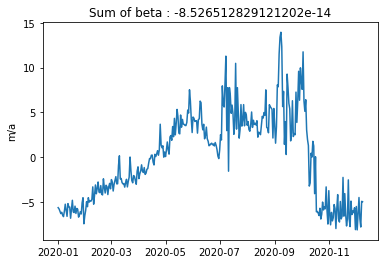

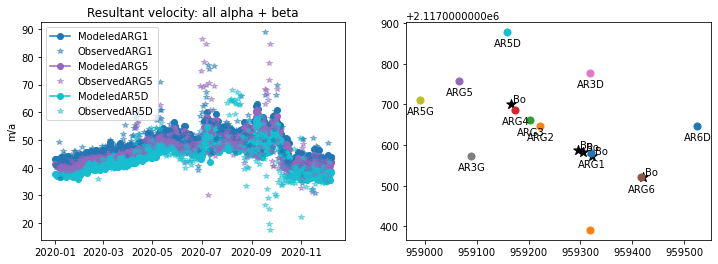

In [11]:
## Plot results
fig_res, ax_res = plt.subplots( figsize = (6, 4))
ax_res.plot(indices_betas, beta_t, label = 'Fluctuations')
ax_res.set_ylabel('m/a')
ax_res.set_title('Sum of beta : ' +  str(np.sum(beta_t)))

## Check station by station:
def plot_afew_stations( df, fewstations, stations, alphadictio, betat,betaindex, additional_title = ''):
    #
    fig_res_comparison, (ax_res_comparison, axstations) = plt.subplots( figsize = (12, 4), ncols = 2)
    for i, name in enumerate(fewstations):
        color = colors_per_station[name]#next(ax._get_lines.prop_cycler)['color']
        ax_res_comparison.plot(betaindex,np.add(alphadictio.loc[name]['m/a'], betat), marker = 'o', color = color, label = 'Modeled' + name)
        ax_res_comparison.plot(usurf_fivedays_averages[name]['m/a'], '*', alpha = 0.5, zorder = 3, color = color, label = 'Observed' + name)
    ax_res_comparison.set_ylabel('m/a')
    ax_res_comparison.set_title('Resultant velocity: all alpha + beta' + additional_title)
    ax_res_comparison.legend()
#
    for i,(number, value) in enumerate(XY_inclinos.items()):
        # 
        x, y, color, name = value
        axstations.scatter( x, y , color = color, s = 100, marker = '*')
        axstations.annotate( xy = (x+5,y+5), text = name[:2])
    for station in stations:
        color = colors_per_station[station]
        axstations.scatter( stations[station]['x'], stations[station]['y'], color = color, s = 50)
        axstations.annotate( xy = ( stations[station]['x']-25, stations[station]['y']-35, ), text = station)
        #
    fig_res_comparison.savefig( pathpics + 'comparison_datavslinearmodel' + additional_title + '.png', dpi = 300, bbox_inches = 'tight')
    return
plot_afew_stations( PD_all, ['ARG1', 'ARG5', 'AR5D'], stations, alphas, beta_t, indices_betas)

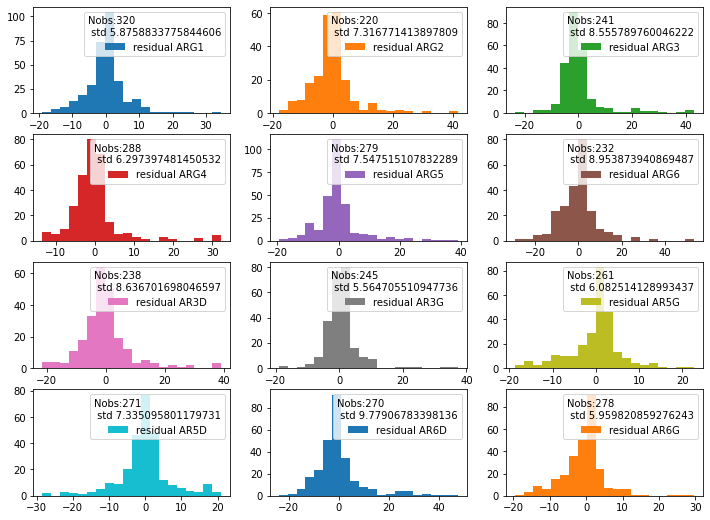

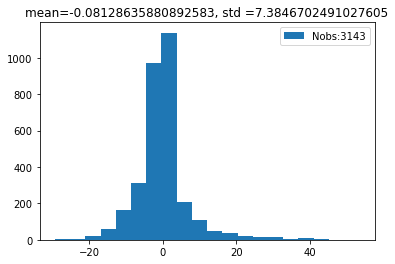

In [12]:
def compute_residuals(dataframe, stations):
    for station in stations:
        dataframe['residual ' + station] = dataframe[station] - dataframe['model ' + station]
    return dataframe
PD_all = compute_residuals(PD_all, station_names)
## Plot residuals
def plot_residuals(df, figname = 'residuals'):
    figresidual, axresidual = plt.subplots( ncols = 3, nrows = 4, figsize = (12, 9))
    K = 0
    for col, content in df.items():
        if 'residual' in col:
            ax_plot = axresidual[K//3][K%3]
            ax_plot.hist(content, label = col, color = colors_per_station[col[-4:]], bins=20)
            ax_plot.legend( title = 'Nobs:' + str(content.count()) + '\n std ' + str(content.std()))
            K = K + 1
    # Plot all residuals together
    all_residuals = pd.DataFrame()
    for col, content in df.items():
        if 'residual' in col:
            all_residuals = pd.concat([all_residuals, content])
    fig_all_residuals, ax_all_residuals = plt.subplots()
    all_residuals_mean = all_residuals[0].mean()
    all_residuals_std = all_residuals[0].std()
    ax_all_residuals.hist( all_residuals, bins = 20, label = 'Nobs:' + str(all_residuals[0].count()))
    ax_all_residuals.legend()
    ax_all_residuals.set_title( 'mean=' + str(all_residuals_mean) + ', std =' + str(all_residuals_std))
    figresidual.savefig( pathpics + figname + '_perstation.jpg', dpi = 300, bbox_inches = 'tight')
    fig_all_residuals.savefig( pathpics + figname + '_alltogether.jpg', dpi = 300, bbox_inches = 'tight')
    return all_residuals_mean, all_residuals_std
all_residuals_mean, all_residuals_std = plot_residuals( PD_all)

In [13]:
## Now we clean the residuals
def clean_residual( df, threshold):
    for col, content in df.items():
        if 'residual' in col:
            station = col[-4:]
            dfaux = df[station]
            dfaux.loc[ content.abs() > threshold ] = np.nan
            df['cleaned ' + station] = dfaux
    return df
threshold_residual_factor = 3
threshold_residual = threshold_residual_factor * all_residuals_std
PD_all_total = clean_residual( PD_all, threshold_residual)
PD_all_total.to_csv( pathpics + 'tableau_cleaned' +  '_.csv')

### We repeat the analysis, now using the cleaned dataset

/home/juanpelvis/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Rows  4093
Columns  353
Aclean shape  (3071, 353)
oclean shape  (3071,)
len x  353
Check sum of beta :  -1.6484591469634324e-12
[ 4.86381641e+01  4.74609422e+01  4.74515916e+01  4.68889335e+01
  4.63006870e+01  4.82773170e+01  4.61416006e+01  4.32944062e+01
  4.43035024e+01  4.35421020e+01  4.67159212e+01  4.24010949e+01
 -6.12982229e+00 -8.44995989e+00 -7.21512774e+00 -6.60803808e+00
 -4.09311498e+00 -8.39040403e+00 -5.19994137e+00 -5.83399642e+00
 -5.69967020e+00 -4.42900401e+00 -6.78813501e+00 -5.17651835e+00
 -7.14474537e+00 -5.44664059e+00 -6.79141289e+00 -5.37904042e+00
 -6.80587651e+00 -6.88554319e+00 -3.05572048e+00 -6.37590710e+00
 -6.88137511e+00 -4.35059902e+00 -4.89743505e+00 -4.87896067e+00
 -5.10703734e+00 -6.65797680e+00 -5.08156090e+00 -4.96387092e+00
 -2.12821808e+00 -2.80872972e+00 -5.09589959e+00 -3.64358263e+00
 -7.43314954e-01 -3.56335562e+00 -2.53735094e+00 -2.53262526e+00
 -2.41383471e+00 -3.16374847e+00 -2.06186341e+00 -2.00514130e+00
 -1.92178962e+00 -3.3851400

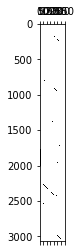

In [14]:
## Pd_all_total has NaNs where we expect noise
column_names_for_clean = [ 'cleaned ' + name for name in station_names]
PD_all_clean = PD_all_total[column_names_for_clean]
# rename columns to stations
PD_all_clean.columns = station_names
# Clean a whole date if all stations show bad data
PD_all_clean.dropna(axis = 0, how = 'all', inplace = True)
oclean,TS_clean = build_vector_obs( PD_all_clean)
nofbetas_clean, indices_betasclean = nofbetas_from_pd(PD_all_clean, station_names)
Aclean= build_matrix_obs( PD_all_clean, nofbetas_clean)
vector_indices_Nan_clean = build_vector_of_indices_withNan(PD_all_clean)
####
# I have to remove also some columns in the matrix, corresponding to the deleted days
####
columns_ofA_todelete = [] # Not needed, aparently is already taken into account
for i,day in enumerate(set(TS)):
    if day not in set(TS_clean):
        columns_ofA_todelete.append(len(station_names) + i) # have to add the numer of alphas!
oclean_deleted = np.delete(oclean, vector_indices_Nan_clean, axis = 0)
Aclean_deleted = np.delete(Aclean, vector_indices_Nan_clean, axis = 0)
plt.spy(Aclean_deleted)
print('Aclean shape ', Aclean_deleted.shape)
print('oclean shape ', oclean_deleted.shape)
xclean, alphasclean, beta_tclean = solve_matrix_system(Aclean_deleted, oclean_deleted, nofbetas_clean, station_names)
#
print(xclean)
print(len(xclean))
#
alphasclean.to_csv( pathpics + 'alphas_from_linearmodel_0p12_cleaned.csv')
betasclean = pd.DataFrame( data = beta_tclean, index = indices_betasclean)
betasclean.columns = ['m/a']
betasclean.to_csv(pathpics + 'beta_tclean.csv')
for station in station_names:
    PD_all_clean = pd.concat([PD_all_clean, pd.DataFrame( np.add(alphasclean.loc[station]['m/a'], beta_tclean), columns = ['model ' + station], index = indices_betasclean)], axis = 1)
PD_all_clean.to_csv( pathpics + 'tableau_cleaned_std' + str(threshold_residual_factor) + DAYS + '.csv')

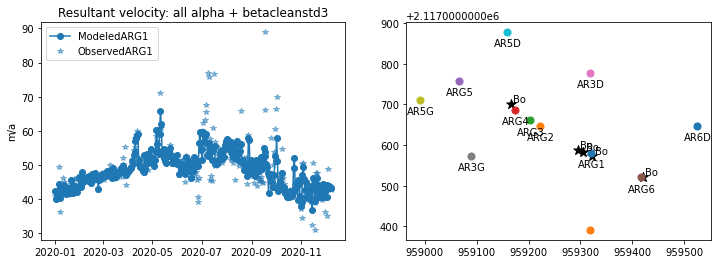

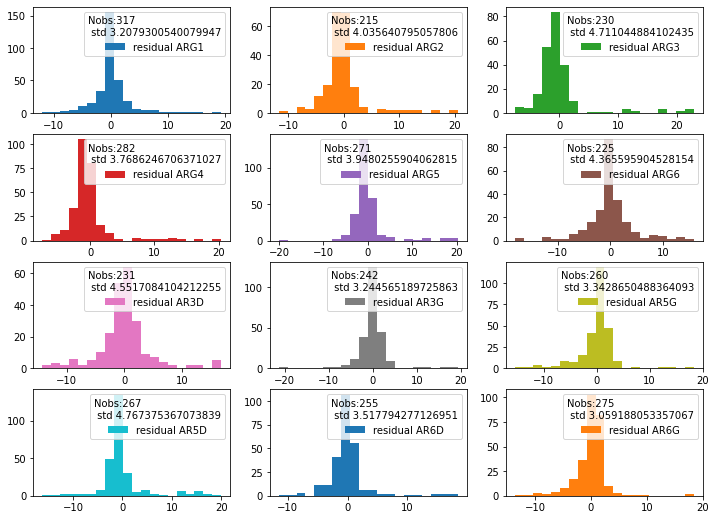

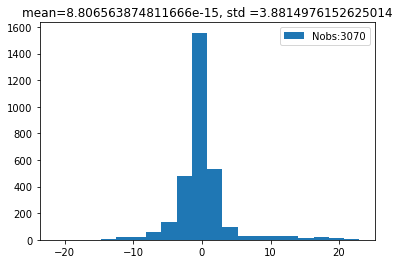

In [15]:
plot_afew_stations( PD_all_clean, ['ARG1'], stations, alphasclean, betasclean, indices_betasclean, additional_title = 'cleanstd' + str(threshold_residual_factor))
PD_all_clean = compute_residuals(PD_all_clean, station_names)
all_residuals_meanclean, all_residuals_stdclean = plot_residuals( PD_all_clean, figname = 'std' + str(threshold_residual_factor) + 'residuals_clean')

### So, what's going on at ARG1?

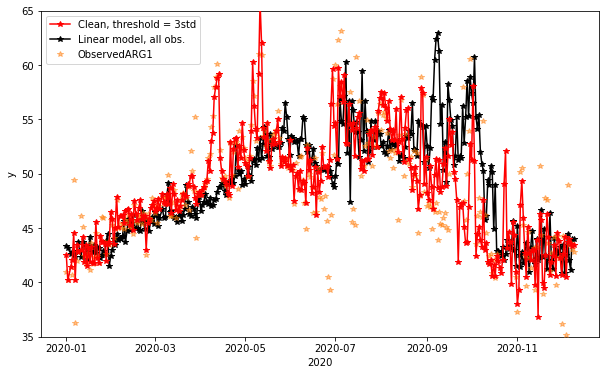

In [16]:
def plot_arg1():
    name = 'ARG1'
    fig_arg1, ax_arg1 = plt.subplots( figsize = (10,6))
    ax_arg1.plot()
    ax_arg1.plot(indices_betasclean, np.add(alphasclean.loc[name]['m/a'], betasclean), 'r-*', label = 'Clean, threshold = ' + str(threshold_residual_factor) + 'std', zorder = 4)
    ax_arg1.plot(indices_betas,np.add(alphas.loc[name]['m/a'], beta_t), 'k-*', zorder = 3, label = 'Linear model, all obs.')
    ax_arg1.plot(usurf_fivedays_averages[name]['m/a'], '*', alpha = 0.5, zorder = 3, color = color, label = 'Observed' + name)
    ax_arg1.legend()
    ax_arg1.set_xlabel('2020')
    ax_arg1.set_ylabel('y')
    ax_arg1.set_ylim([35, 65])
    return fig_arg1, ax_arg1
figarg1, axarg1 = plot_arg1()
figarg1.savefig(pathpics + 'Comparison_usurf_arg1_std' + str(threshold_residual_factor) + DAYS + '.jpg', dpi = 300, bbox_inches = 'tight')

## From here down below we deal with old code. Do not consider

['ARG1', 'ARG2', 'ARG3', 'ARG4', 'ARG5', 'ARG6']


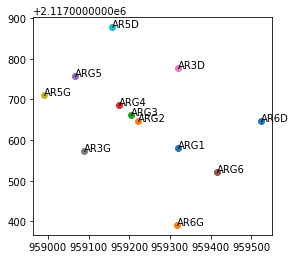

In [17]:
figgps, axgps = plt.subplots()
for station in stations:
    color = colors_per_station[station]
    axgps.scatter( stations[station]['x'], stations[station]['y'], color = color)
    axgps.annotate( xy = ( stations[station]['x'], stations[station]['y'], ), text = station)
axgps.set_aspect(1)
# ergo:
list_of_along_flow_gps = ['ARG'+str(i) for i in range(1,7)]
print(list_of_along_flow_gps)
figgps.savefig(pathpics + 'gps_positions_inargentiere_2020.png', dpi = 200, bbox_inches = 'tight')
# next step: do a weighted average based on square distances: TOTAL_DIST = SUM(1 - 

In [18]:
Bs = []
for st in list_of_along_flow_gps:
    if st.upper() == 'ARG1':
        A = stations[st.upper()]['velocity_averaged']['m/a']
        A.index = A.index.date.astype('datetime64')
    else:
        B = stations[st.upper()]['velocity_averaged']['m/a']
        B.index = B.index.date.astype('datetime64')
        Bs.append((st, B))

        ARG2       ARG3       ARG4       ARG5       ARG6
m   0.835615   0.390404   0.636134   0.812308   0.720512
n   8.926813  29.934288  19.035395  11.106145  14.164816
R2  0.739494   0.275805   0.514718   0.738458   0.437938


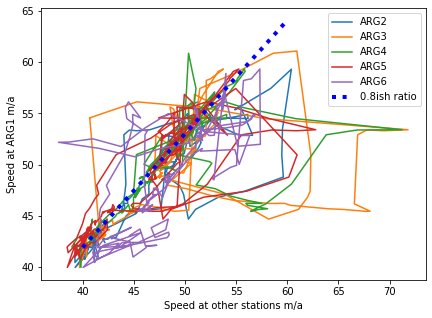

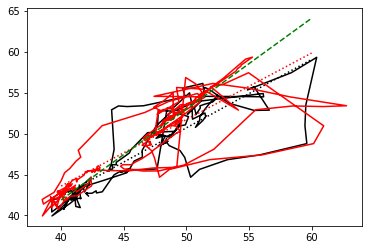

In [19]:
fig_lin, axlin = plt.subplots( figsize = (8, 5))
from scipy import stats
#
dic_regression = {}
#
def manual_fit(x, m, n):
    return m*x + n
for B in Bs:
    common = A.index.intersection(B[1].index)
    axlin.plot( B[1].loc[common], A.loc[common], label = B[0])
    res = stats.linregress(B[1].loc[common], A.loc[common], )
    dic_regression[B[0]] = {'m' : res.slope, 'n' : res.intercept, 'R2' : res.rvalue**2}
axlin.set_aspect(1)
#axlin.plot( [40, 60], [40, 60], 'k:', linewidth = 4, label = 'One to one ratio')
xratio = np.array([40, 60])
m = 1.11
n = -2.5
axlin.plot( xratio, manual_fit(xratio, m, n), 'b:', linewidth = 4, label = '0.8ish ratio')
#
#
axlin.legend()
axlin.set_ylabel('Speed at ARG1 m/a')
axlin.set_xlabel('Speed at other stations m/a')
fig_lin.savefig(pathpics + 'velocities_comparisons.png', dpi = 200, bbox_inches = 'tight')
#
df_reg = pd.DataFrame(data = dic_regression)
print(df_reg)
figreg, axreg = plt.subplots()
common = A.index.intersection(Bs[0][1].index)
axreg.plot( Bs[0][1].loc[common], A.loc[common], 'k-', label = Bs[0][0])
axreg.plot([40, 60], manual_fit(np.array([40,60]), df_reg[Bs[0][0]].loc['m'], df_reg[Bs[0][0]].loc['n']), 'k:')
common = A.index.intersection(Bs[3][1].index)
axreg.plot( Bs[3][1].loc[common], A.loc[common], 'r-',label = Bs[3][0])
axreg.plot([40, 60], manual_fit(np.array([40,60]), df_reg[Bs[3][0]].loc['m'], df_reg[Bs[3][0]].loc['n']), 'r:')
axreg.plot([40, 60], manual_fit(np.array([40,60]), 1.11 , -2.5), 'g--')

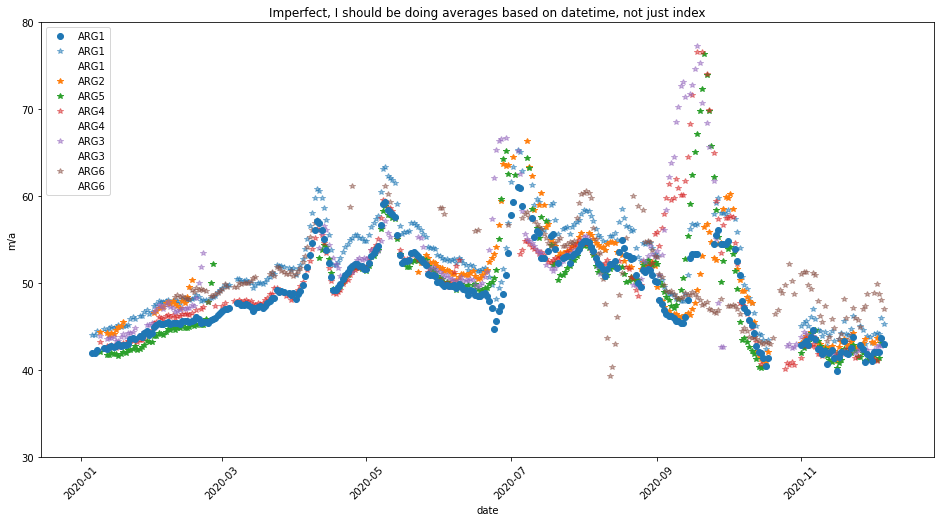

In [20]:
fig, ax = plt.subplots( figsize = (16,8))
stations_bis = ['ARG1', 'ARG2', 'ARG5', 'ARG4', 'ARG3', 'ARG6']
for station in stations_bis:
    #
    alpha = 0
    color = next(ax._get_lines.prop_cycler)['color']
    if station == 'ARG1':
        ax.plot(stations[station]['velocity_averaged']['m/a'], 'o', zorder = 6, color = color, label = station)
        ax.plot(stations[station]['velocity']['m/a'], '*', zorder = 2, alpha = alpha, color = color)
    if station in ['ARG2', 'ARG5']:
        ax.plot(manual_fit(stations[station]['velocity_averaged']['m/a'], m, n), '*', zorder = 3, alpha = 1, color = color, label = station)
        ax.plot(stations[station]['velocity']['m/a'], '*', zorder = 2, alpha = alpha, color = color)
    else:
        ax.plot(manual_fit(stations[station]['velocity_averaged']['m/a'], m, n), '*', zorder = 3, alpha = 0.5, color = color, label = station)
        ax.plot(stations[station]['velocity_averaged']['m/a'], '*', zorder = 3, color = color, alpha = 0, label = station)
        ax.plot(manual_fit(stations[station]['velocity']['m/a'], m, n), '*', zorder = 2, alpha = alpha, color = color)
ax.set_title('Imperfect, I should be doing averages based on datetime, not just index')
ax.set_ylabel('m/a')
ax.set_xlabel('date')
ax.legend(loc = 'upper left')
ax.set_ylim([30, 80])
ax.tick_params(axis='x', labelrotation=45)
fig.savefig(pathpics + 'velocities_closetoBH2_in_Argentiere2020.png', dpi = 200, bbox_inches = 'tight')
#